In [97]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r"/Users/karlifro/Desktop/CSV files/movies.csv")

In [98]:
#Quick data inspection

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [99]:
#Check for any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [100]:
# Remove rows with any missing value

df.dropna(inplace=True)

In [103]:
#Check columns data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [102]:
#Change columns data types

df["budget"] = df["budget"].astype("int64")

df["gross"] = df["gross"].astype("int64")

df["votes"] = df["votes"].astype("int64")

df["runtime"] = df["runtime"].astype("int64")

In [124]:
#Create correct year column

df['correct_year'] = df['released'].str.split(',', expand=True)[1].str[:5]

df.head

<bound method NDFrame.head of                                             name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  scor

In [105]:
df = df.sort_values(by=["gross"], inplace=False, ascending=False)

In [126]:
pd.set_option('display.max_rows', 30)

In [127]:
#Check for duplicates and drop them

df["company"].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

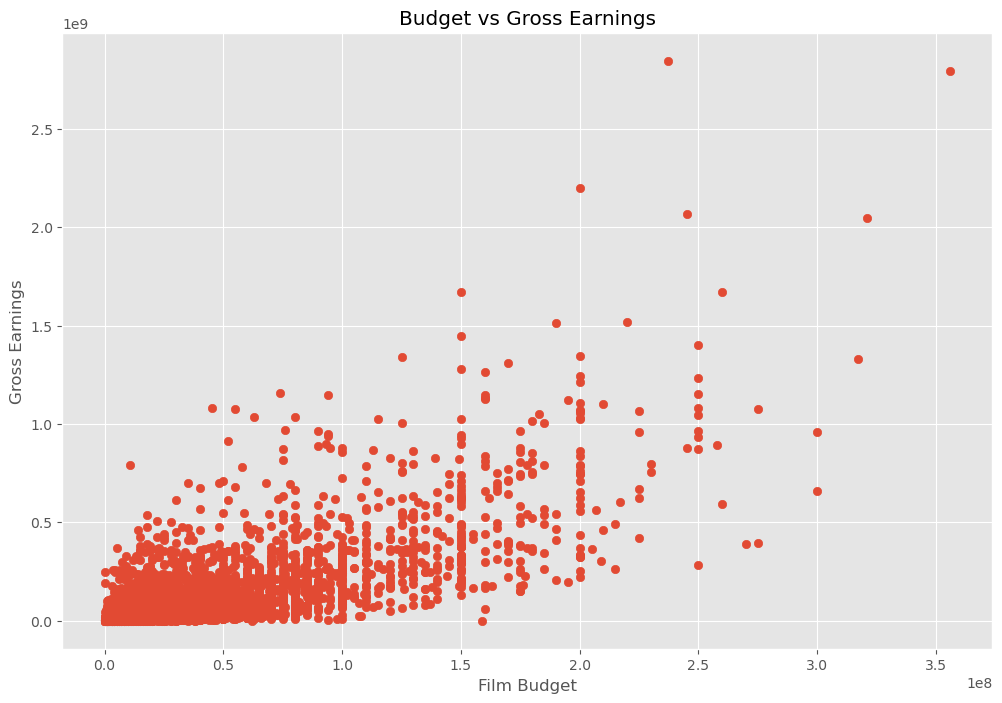

In [107]:
#Scatter plot with budget vs gross

plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs Gross Earnings")

plt.xlabel("Film Budget")

plt.ylabel("Gross Earnings")

plt.show


<Axes: xlabel='budget', ylabel='gross'>

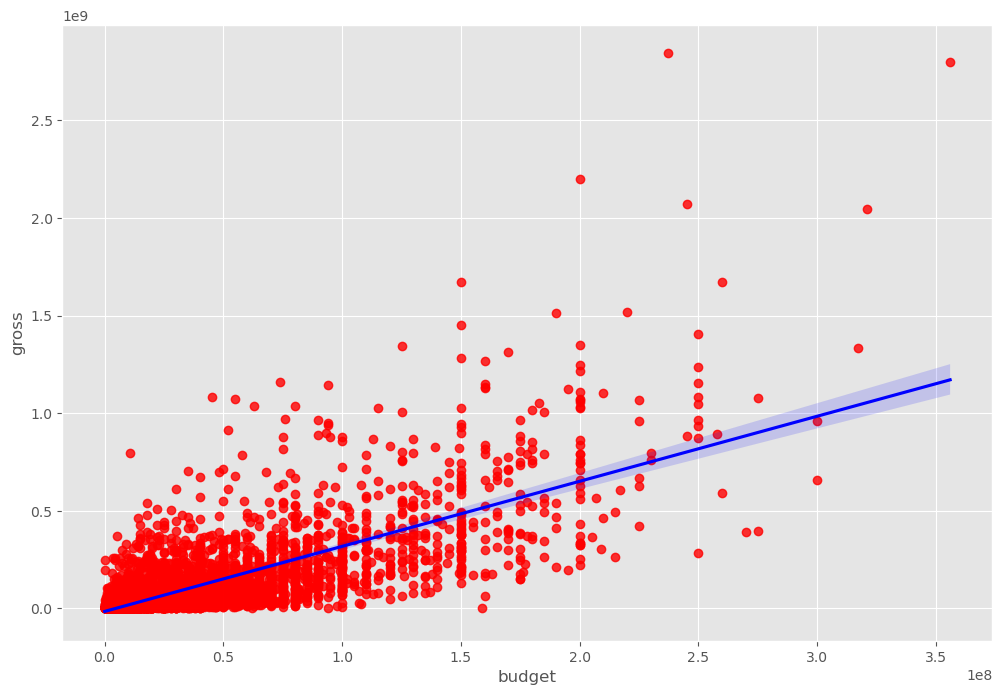

In [59]:
#Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [108]:
#Looking at correlation using the Pearson method 

df.corr(method="pearson")

/tmp/ipykernel_25266/1151254194.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

/tmp/ipykernel_25266/3143174686.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="pearson")


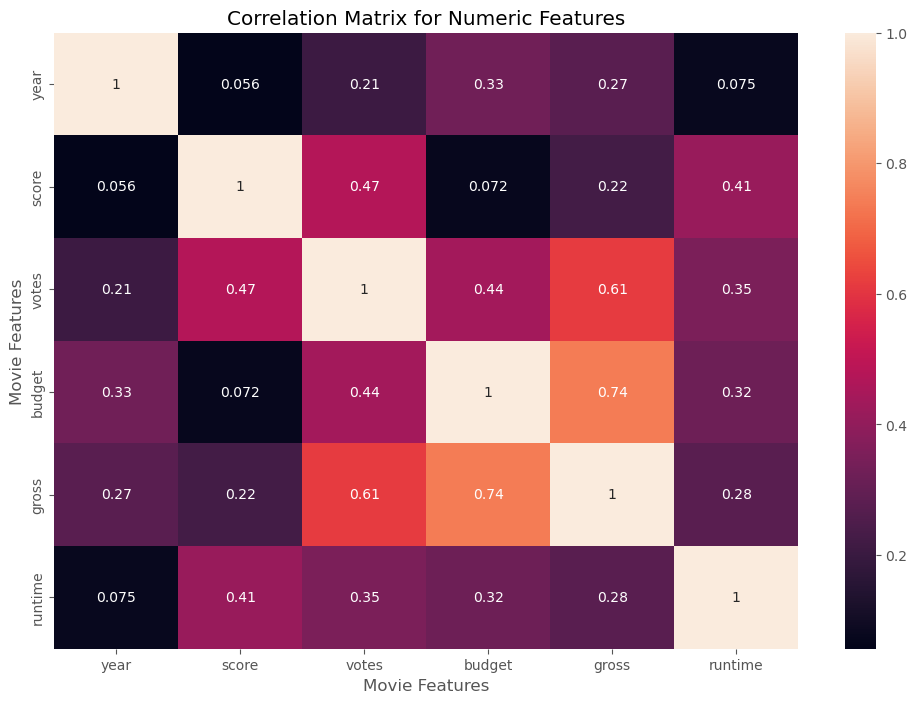

In [64]:
correlation_matrix = df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [96]:
#Numerize columns

df_numerized = df

for col_name in df_numerized.columns : 
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
            
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

In [128]:
df

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime correct_year  
5445  2847246203      Twentieth Century Fox      162         2009  
7445  2797501328             Marvel Studios      181         2019  
3045  2201647264      Twentieth Century Fox      194         1997  
6663  2069521700                  Lucasfilm      138         2015  
7244  2048359754             Marvel Studios      149         2018  
...          ...                        ...      ...          ...  
5640        5073           Two Prong Lesson       96         2015  
2434        2970           Trimark Pictures       97         1994  
3681        2554  Copperheart Entertainment      108         2001  
272         2270           Embassy Pictures       85         1982  
3203         309                   Daybreak       85         1997  

[5421 rows x 16 columns]

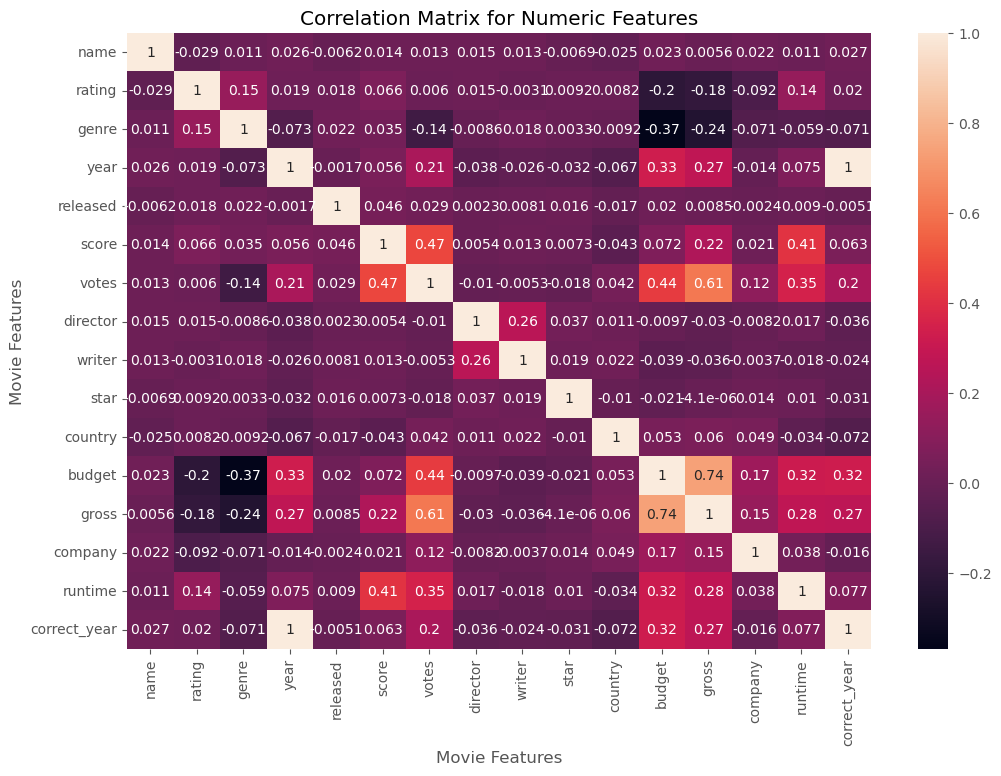

In [111]:
correlation_matrix = df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [112]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating       -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre         0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year          0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released     -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score         0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes         0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director      0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer        0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star         -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country      -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget        0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross         0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company       0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime       0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
correct_year  0.026759  0.019560 -0.070699  0.996723 -0.005141  0.062648   

                 votes  director    writer      star   country    budget  \
name          0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating        0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre        -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year          0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released      0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score         0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes         1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director     -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer       -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star         -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country       0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget        0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross         0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company       0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime       0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
correct_year  0.204183 -0.035738 -0.023603 -0.030840 -0.072407  0.321624   

                 gross   company   runtime  correct_year  
name          0.005639  0.021697  0.010850      0.026759  
rating       -0.181906 -0.092357  0.140792      0.019560  
genre        -0.244101 -0.071334 -0.059237     -0.070699  
year          0.274321 -0.014333  0.075077      0.996723  
released      0.008501 -0.002407  0.008975     -0.005141  
score         0.222556  0.020656  0.414068      0.062648  
votes         0.614751  0.118470  0.352303      0.204183  
director     -0.029560 -0.008223  0.017433     -0.035738  
writer       -0.035885 -0.003697 -0.017561     -0.023603  
star         -0.000004  0.014082  0.010108     -0.030840  
country       0.060078  0.048569 -0.034477     -0.072407  
budget        0.740247  0.170235  0.318695      0.321624  
gross         1.000000  0.149553  0.275796      0.269479  
company       0.149553  1.000000  0.037585     -0.015587  
runtime       0.275796  0.037585  1.000000      0.076666  
correct_year  0.269479 -0.015587  0.076666      1.000000

In [129]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
                                ...   
correct_year  budget          0.321624
              gross           0.269479
              company        -0.015587
              runtime         0.076666
              correct_year    1.000000
Length: 256, dtype: float64

In [130]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [120]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
correct_year  year            0.996723
year          correct_year    0.996723
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64